# **Početno učitavanje podataka**

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import seaborn as sns
import numpy as np


url = 'https://raw.githubusercontent.com/abanic7/PredictingNBAShots/main/shot_logs.csv?token=GHSAT0AAAAAABZ76MCNIU6EDX6U6RL7IZBEY3OUJ4A'
df_original = pd.read_csv(url)
df = df_original.copy()
#print(plt.style.available)
plt.style.use('seaborn')

# **Pregled podataka**

In [2]:
#postavljanje opcije za prikaz prvih 100 zapisa
pd.set_option('display.max_columns',100)

#prikaz prvih 5 zapisa
df.head(5)


,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [3]:
df.describe(include='all')


,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
count,1.280690e+05,128069,128069,128069,128069.000000,128069.000000,128069.000000,128069,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069,128069,128069.000000,128069.000000,128069.000000,128069.000000,128069,128069.000000
unique,NaN,1808,2,2,NaN,NaN,NaN,719,NaN,NaN,NaN,NaN,NaN,2,473,NaN,NaN,NaN,NaN,281,NaN
top,NaN,"FEB 07, 2015 - DAL vs. POR",A,W,NaN,NaN,NaN,0:01,NaN,NaN,NaN,NaN,NaN,missed,"Ibaka, Serge",NaN,NaN,NaN,NaN,james harden,NaN
freq,NaN,105,64135,64595,NaN,NaN,NaN,859,NaN,NaN,NaN,NaN,NaN,70164,814,NaN,NaN,NaN,NaN,1054,NaN
mean,2.140045e+07,NaN,NaN,NaN,0.208723,6.506899,2.469427,NaN,12.453344,2.023355,2.765901,13.571504,2.264670,NaN,NaN,159038.487284,4.123015,0.452139,0.997314,NaN,157238.251247
std,2.578773e+02,NaN,NaN,NaN,13.233267,4.713260,1.139919,NaN,5.763265,3.477760,3.043682,8.888964,0.441159,NaN,NaN,78791.172947,2.756446,0.497706,1.130978,NaN,79362.389336
min,2.140000e+07,NaN,NaN,NaN,-53.000000,1.000000,1.000000,NaN,0.000000,0.000000,-163.600000,0.000000,2.000000,NaN,NaN,708.000000,0.000000,0.000000,0.000000,NaN,708.000000
25%,2.140023e+07,NaN,NaN,NaN,-8.000000,3.000000,1.000000,NaN,8.200000,0.000000,0.900000,4.700000,2.000000,NaN,NaN,101249.000000,2.300000,0.000000,0.000000,NaN,101162.000000
50%,2.140045e+07,NaN,NaN,NaN,1.000000,5.000000,2.000000,NaN,12.300000,1.000000,1.600000,13.700000,2.000000,NaN,NaN,201949.000000,3.700000,0.000000,0.000000,NaN,201939.000000
75%,2.140067e+07,NaN,NaN,NaN,9.000000,9.000000,3.000000,NaN,16.675000,2.000000,3.700000,22.500000,3.000000,NaN,NaN,203079.000000,5.300000,1.000000,2.000000,NaN,202704.000000


In [4]:
df.columns.values

array(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN',
       'SHOT_NUMBER', 'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES',
       'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT',
       'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST',
       'FGM', 'PTS', 'player_name', 'player_id'], dtype=object)

In [5]:
#Pregled podataka radi provjere postoje li nedostajuće vrijednosti
#Vidimo da fali 5567 vrijednosti atributa SHOT_CLOCK
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  122502 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

GAME_ID                          0
MATCHUP                          0
LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER                 0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
player_name                      0
player_id                        0
dtype: int64

In [6]:
#Pregled radi provjere monotonih podataka
df.nunique()

GAME_ID                        904
MATCHUP                       1808
LOCATION                         2
W                                2
FINAL_MARGIN                    88
SHOT_NUMBER                     38
PERIOD                           7
GAME_CLOCK                     719
SHOT_CLOCK                     241
DRIBBLES                        33
TOUCH_TIME                     313
SHOT_DIST                      448
PTS_TYPE                         2
SHOT_RESULT                      2
CLOSEST_DEFENDER               473
CLOSEST_DEFENDER_PLAYER_ID     474
CLOSE_DEF_DIST                 299
FGM                              2
PTS                              3
player_name                    281
player_id                      281
dtype: int64

## **Čišćenje i pretvaranje podataka**

Vidimo da nedostaje 5567 SHOT_CLOCK vrijednosti pa imamo više mogućnosti za rješavanje problema nedostajućih vrijednost. 

Možemo:
*   u potpunosti izbaciti te značajke iz skupa podataka
*   interpolacija
*   pronalazak točnih vrijednosti iz drugih izvora podataka
*   zamijeniti srednjom vrijednošću
*   u potpunosti izbaciti te zapise iz skupa podataka
 item


Odlučio sam se za izbacivanje tih zapisa iz skupa podataka pošto su ostale opcije vrlo teške za izvesti, a ovako gubimo oko 4% zapisa što je prihvatljivo.



In [7]:
df = df[df.SHOT_CLOCK.notnull()]
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 122502 entries, 0 to 128067
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     122502 non-null  int64  
 1   MATCHUP                     122502 non-null  object 
 2   LOCATION                    122502 non-null  object 
 3   W                           122502 non-null  object 
 4   FINAL_MARGIN                122502 non-null  int64  
 5   SHOT_NUMBER                 122502 non-null  int64  
 6   PERIOD                      122502 non-null  int64  
 7   GAME_CLOCK                  122502 non-null  object 
 8   SHOT_CLOCK                  122502 non-null  float64
 9   DRIBBLES                    122502 non-null  int64  
 10  TOUCH_TIME                  122502 non-null  float64
 11  SHOT_DIST                   122502 non-null  float64
 12  PTS_TYPE                    122502 non-null  int64  
 13  SHOT_RESULT   

In [13]:
df.loc[:,'GAME_CLOCK']

def changeGameClockToSeconds(time):
  time = time.split(":")
  seconds = int(time[0]) * 60 + int(time[1])
  return seconds


#DRUGI NAČIN

# for i, row in df.iterrows():
#     time = row['GAME_CLOCK']
#     time = time.split(":")
#     seconds = int(time[0]) * 60 + int(time[1])
#     # if i < 5:
#     #   print(time)
#     #   print(seconds)
#     df.at[i,'GAME_CLOCK'] = seconds


df['GAME_CLOCK'] = df['GAME_CLOCK'].apply(changeGameClockToSeconds)


In [14]:
df['GAME_CLOCK']

0          69
1          14
3         707
4         634
5         495
         ... 
128063    305
128064    112
128065    688
128066    670
128067    157
Name: GAME_CLOCK, Length: 122502, dtype: int64

Pretvaranje vrijednosti značajke GAME_CLOCK iz stringa u sekunde kao cijeli broj.

In [15]:
#Pretvaranje udaljenosti iz feeta u metre
def changeFeetToMeters(distance):
  return distance * 0.3048 

df['SHOT_DIST'] = df['SHOT_DIST'].apply(changeFeetToMeters)
df['CLOSE_DEF_DIST'] = df['CLOSE_DEF_DIST'].apply(changeFeetToMeters)

In [16]:
#Izbacivanje nepotrebnih značajki
df_cleaned = df.drop(columns =['GAME_ID', 'MATCHUP','W','FINAL_MARGIN','SHOT_RESULT','CLOSEST_DEFENDER_PLAYER_ID','player_id'])
df_cleaned.head(5)

,LOCATION,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER,CLOSE_DEF_DIST,FGM,PTS,player_name
0,A,1,1,69,10.8,2,1.9,2.34696,2,"Anderson, Alan",0.39624,1,2,brian roberts
1,A,2,1,14,3.4,0,0.8,8.59536,3,"Bogdanovic, Bojan",1.85928,0,0,brian roberts
3,A,4,2,707,10.3,2,1.9,5.24256,2,"Brown, Markel",1.03632,0,0,brian roberts
4,A,5,2,634,10.9,2,2.7,1.12776,2,"Young, Thaddeus",0.33528,0,0,brian roberts
5,A,6,2,495,9.1,2,4.4,5.60832,2,"Williams, Deron",0.79248,0,0,brian roberts


Izbacio sam neke od značajki pošto ne igraju nikakvu ulogu u daljnjem dijelu projekta pošto ne služe za predikciju šuta.
Ti atributi su:

GAME_ID => izbačen jer je to samo ID

MATCHUP => Nije bitno s kim je igrana utakmica odnosno koja momčad je protivnička

W => Nije bitno je li na kraju utakmica pobijeđena ili nije

FINAL_MARGIN => Nije bitan ukupan rezultat

SHOT_RESULT => Ova značajka je već sadržana u FGM

CLOSEST_DEFENDER_PLAYER_ID => ID obrambenog igrača je nebitan

PLAYER_ID => ID igrača je nebitan

### **Mijenjanje formata značajki Label encoderom**

In [17]:
#Mijenjanje zapisa gdje je utakmica igrana(A,H => 0,1)
le = LabelEncoder()

le.fit(df_cleaned.loc[:,'LOCATION'])
#print(le.classes_)

df_cleaned.loc[:,'LOCATION'] = le.transform(df_cleaned.loc[:,'LOCATION'])

df_cleaned['LOCATION']

0         0
1         0
3         0
4         0
5         0
         ..
128063    0
128064    0
128065    0
128066    0
128067    0
Name: LOCATION, Length: 122502, dtype: int64

In [18]:
df_cleaned.describe()

,LOCATION,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,FGM,PTS
count,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000
mean,0.499478,6.476164,2.471454,361.068529,12.453344,1.989233,2.759757,4.097657,2.258363,1.256296,0.456156,1.005469
std,0.500002,4.681245,1.137898,202.024393,5.763265,3.411188,2.931794,2.675264,0.437736,0.838684,0.498076,1.131129
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,1.000000,187.000000,8.200000,0.000000,0.900000,1.432560,2.000000,0.701040,0.000000,0.000000
50%,0.000000,5.000000,2.000000,362.000000,12.300000,1.000000,1.600000,4.084320,2.000000,1.127760,0.000000,0.000000
75%,1.000000,9.000000,3.000000,536.000000,16.675000,2.000000,3.700000,6.827520,3.000000,1.615440,1.000000,2.000000
max,1.000000,37.000000,7.000000,720.000000,24.000000,32.000000,24.900000,13.258800,3.000000,16.215360,1.000000,3.000000


###**Pronalazak stršećih vrijednosti** 


In [8]:
df['TOUCH_TIME'].describe()


count    122502.000000
mean          2.748202
std           2.957237
min        -100.500000
25%           0.900000
50%           1.600000
75%           3.700000
max          24.900000
Name: TOUCH_TIME, dtype: float64

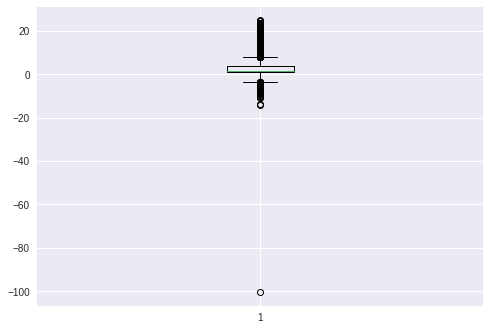

In [9]:
tt = df['TOUCH_TIME']
plt.boxplot(tt)
plt.show()

Vidimo kako značajka TOUCH_TIME ima stršeće vrijednosti, ali također ima i negativne vrijednosti što je definitivno krivo.

In [10]:
filt = df['TOUCH_TIME'] < 0
df.loc[filt,['TOUCH_TIME']]

,TOUCH_TIME
748,-4.3
775,-0.4
1118,-3.2
1260,-1.3
1860,-0.2
...,...
124820,-4.2
125018,-1.2
125057,-8.8
125059,-0.4


Imamo 300 zapisa s negativnim vrijednostima atributa TOUCH_TIME pa ćemo ih promijeniti tako da umjesto negativne vrijednosti imaju prosjek ostalih zapisa atributa.

In [11]:

df.loc[df['TOUCH_TIME']< 0,'TOUCH_TIME'] = df['TOUCH_TIME'].mean()
df['TOUCH_TIME'].describe()


count    122502.000000
mean          2.759757
std           2.931794
min           0.000000
25%           0.900000
50%           1.600000
75%           3.700000
max          24.900000
Name: TOUCH_TIME, dtype: float64

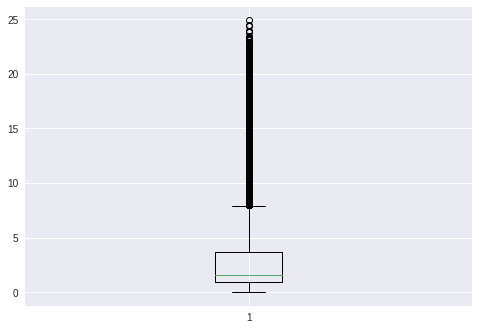

In [12]:
tt = df['TOUCH_TIME']
plt.boxplot(tt)
plt.show()

# **Vizualizacija podataka**

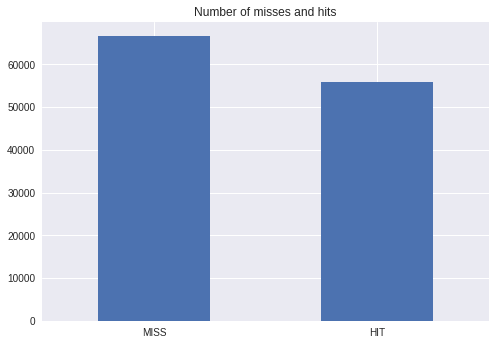

In [19]:
#Broj promašaja i pogodaka
df_cleaned['FGM'].value_counts().plot(kind="bar",title="Number of misses and hits")
plt.xticks((0,1),('MISS','HIT'),rotation='horizontal')
plt.show()


In [20]:
np.round((df_cleaned['FGM'].value_counts() / len(df_cleaned) * 100),2).astype(str) + '%'

0    54.38%
1    45.62%
Name: FGM, dtype: object

In [21]:
#Pregledom podataka shvatio sam da postoji anomalija gdje su šutevi dalje od trice, a prikazani su kao 2 poena
df_cleaned[df_cleaned['SHOT_DIST'] > 8].sort_values('PTS_TYPE')

,LOCATION,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER,CLOSE_DEF_DIST,FGM,PTS,player_name
53117,0,7,3,688,13.3,4,5.2,8.16864,2,"Chalmers, Mario",3.16992,0,0,avery bradley
101269,0,1,1,701,6.0,0,0.1,8.53440,2,"Hayward, Gordon",3.32232,0,0,rudy gay
40004,0,7,2,647,16.9,8,6.7,8.86968,2,"Exum, Dante",2.04216,1,2,dirk nowtizski
29537,1,13,4,237,19.5,0,0.0,8.71728,2,"Henderson, Gerald",3.26136,1,2,tyreke evans
119756,0,4,2,587,24.0,0,2.4,8.41248,2,"Stoudemire, Amar'e",1.58496,1,2,chris kaman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40870,0,3,3,344,9.5,0,1.0,8.13816,3,"Adams, Steven",2.10312,0,0,evan fournier
40879,1,7,3,231,17.4,0,0.9,8.41248,3,"Ellis, Monta",2.16408,1,3,evan fournier
40887,1,5,3,73,0.2,1,1.9,8.65632,3,"Mayo, O.J.",0.91440,0,0,evan fournier
40851,1,3,2,552,21.0,0,1.0,8.22960,3,"Brooks, Aaron",1.61544,0,0,evan fournier


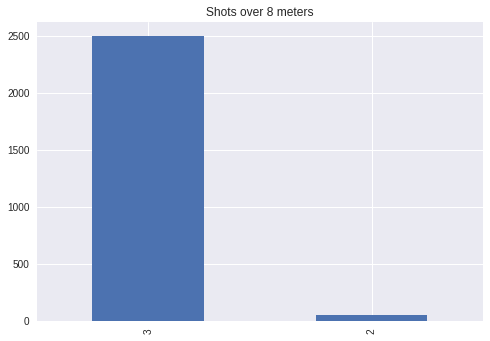

In [22]:
df_cleaned[df_cleaned['SHOT_DIST'] > 8 ]['PTS_TYPE'].value_counts().plot(kind="bar",title='Shots over 8 meters')
plt.show()


Možemo vidjeti da ovdje nešto ne valja. Šutevi koji su preko 8 metara sigurno moraju biti za 3 poena, ali vidimo da ih ima i koji su za 2 poena.

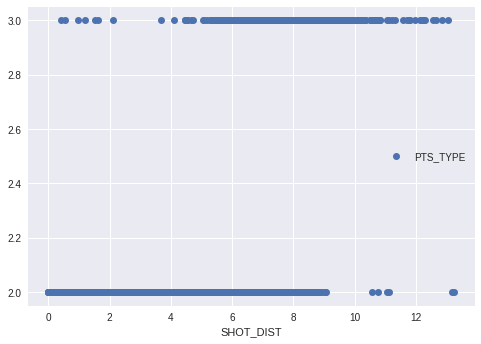

In [23]:
df.plot('SHOT_DIST'[:50],'PTS_TYPE'[:50],style='o')
plt.show()


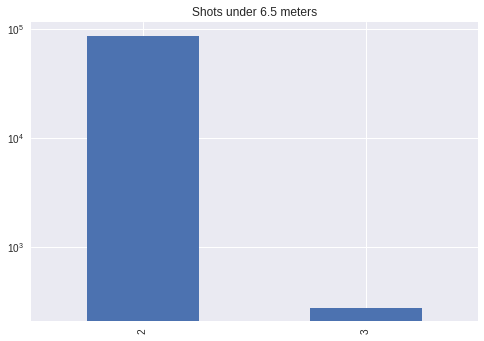

In [24]:
df_cleaned[df_cleaned['SHOT_DIST'] < 6.5 ]['PTS_TYPE'].value_counts().plot(kind="bar",title='Shots under 6.5 meters')
plt.yscale('log')


Vidimo da postoje anomalije u podacima. Kasnije ćemo odlučiti što ćemo napraviti s tim.

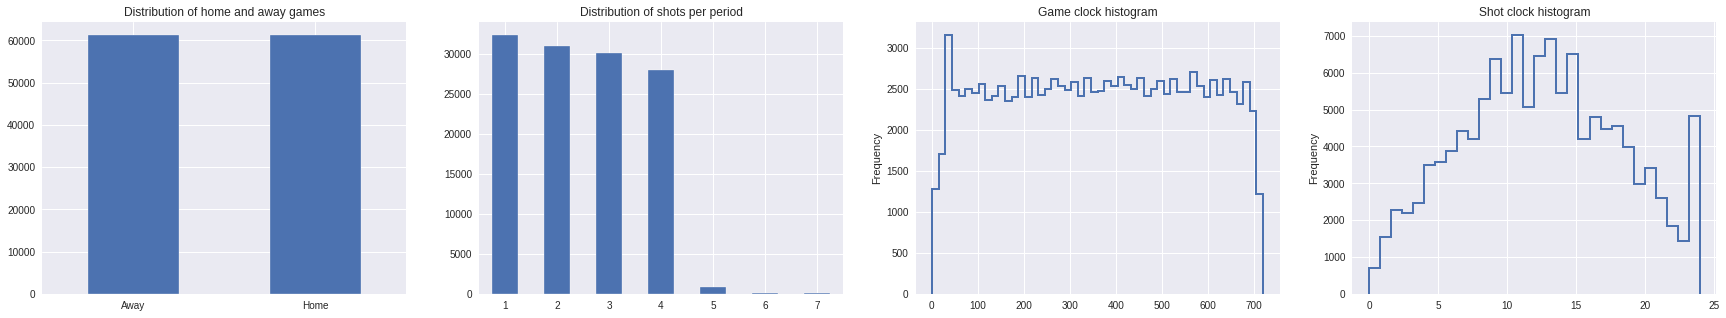

In [38]:
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1,4,figsize=(30, 5))

ax1 = df_cleaned['LOCATION'].value_counts().plot(kind="bar",title='Distribution of home and away games',ax=ax1)
ax1.set_xticks((0,1))
ax1.set_xticklabels(('Away','Home'),rotation='horizontal')


ax2 = df_cleaned['PERIOD'].value_counts().plot(kind="bar",title='Distribution of shots per period',ax=ax2)
ax2.set_xticklabels(([i for i in range(1,8)]),rotation='horizontal')

ax3 = df_cleaned['GAME_CLOCK'].plot(kind="hist",bins=50,histtype='step',title="Game clock histogram",ax=ax3,lw="2")

ax4= df_cleaned['SHOT_CLOCK'].plot(kind="hist",bins=30,histtype='step',title="Shot clock histogram",ax=ax4,lw="2")




plt.show()

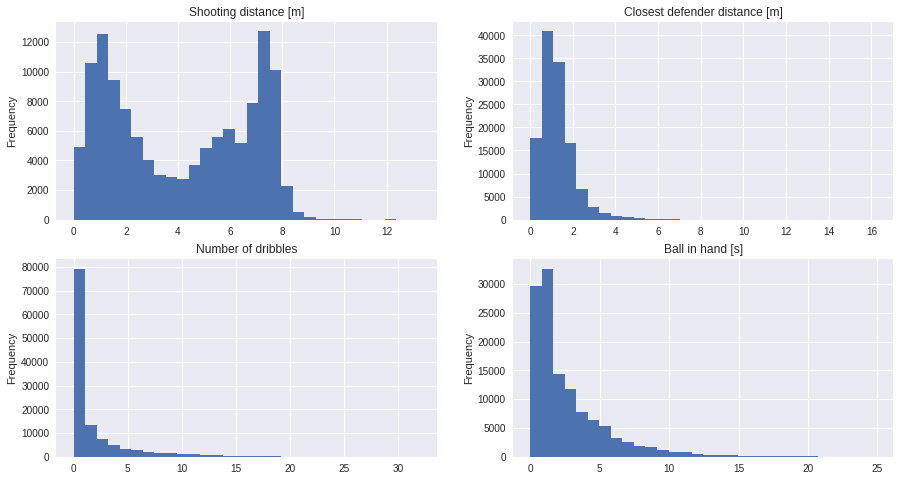

In [26]:
fig, axs = plt.subplots(2,2,figsize=(15, 8))

ax1 = df_cleaned['SHOT_DIST'].plot.hist(bins=30,ax=axs[0,0])
ax1.set_title("Shooting distance [m]")

ax2 = df_cleaned['CLOSE_DEF_DIST'].plot.hist(bins=30,ax=axs[0,1])
ax2.set_title("Closest defender distance [m]")

ax3 = df_cleaned['DRIBBLES'].plot.hist(bins=30,ax=axs[1,0])
ax3.set_title("Number of dribbles")

ax4 = df_cleaned['TOUCH_TIME'].plot.hist(bins=30,ax=axs[1,1])
ax4.set_title("Ball in hand [s]")

plt.show()

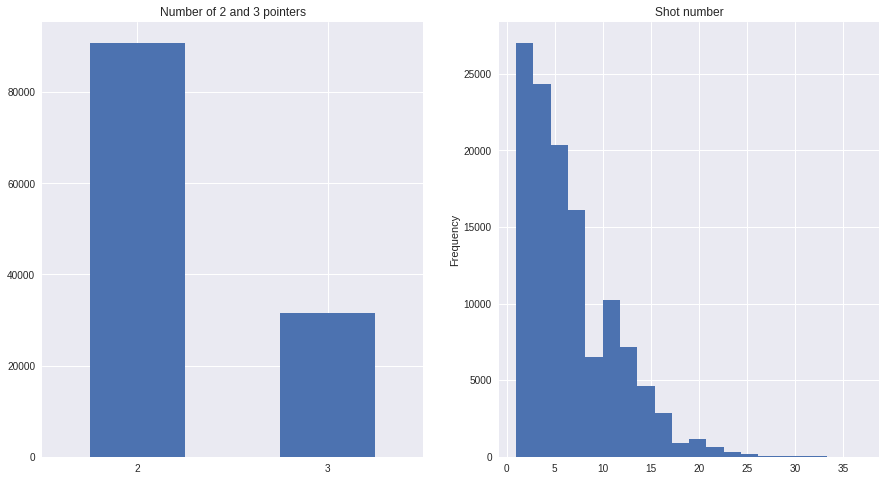

In [27]:
fig, axs = plt.subplots(1,2,figsize=(15, 8))


ax1 = df_cleaned['PTS_TYPE'].value_counts().plot(kind="bar",title="Number of 2 and 3 pointers",ax=axs[0])
ax1.set_xticklabels((2,3),rotation='horizontal')

ax2 = df_cleaned['SHOT_NUMBER'].plot.hist(bins=20,ax=axs[1])
ax2.set_title("Shot number")

plt.show()

In [28]:
#Broj šuteva za 2 u odnosu na broj šuteva za 3
np.round((df_cleaned['PTS_TYPE'].value_counts() / len(df_cleaned) * 100),2).astype(str) + '%'

2    74.16%
3    25.84%
Name: PTS_TYPE, dtype: object

Pogledajmo udaljenost protivnika s obzirom na vrstu šuta

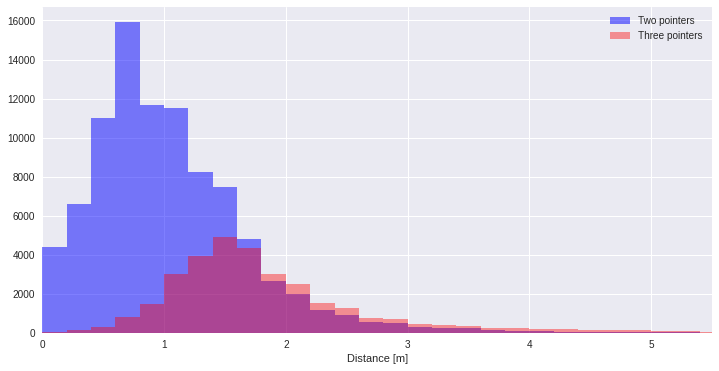

In [29]:
plt.figure(figsize = [12, 6]);
bins = np.arange(0.0, 6.0, 0.2)
plt.hist(df_cleaned[df_cleaned['PTS_TYPE'] == 2]['CLOSE_DEF_DIST'],bins=bins,alpha=0.5,label="Two pointers",color="blue")
plt.hist(df_cleaned[df_cleaned['PTS_TYPE'] == 3]['CLOSE_DEF_DIST'],bins=bins,alpha=0.4,label="Three pointers",color="red")
plt.xlim(0,5.5)
plt.xlabel("Distance [m]")
plt.legend()
plt.show()

## **Odnos postotka pogotka s ostalim relevantnim značajkama**

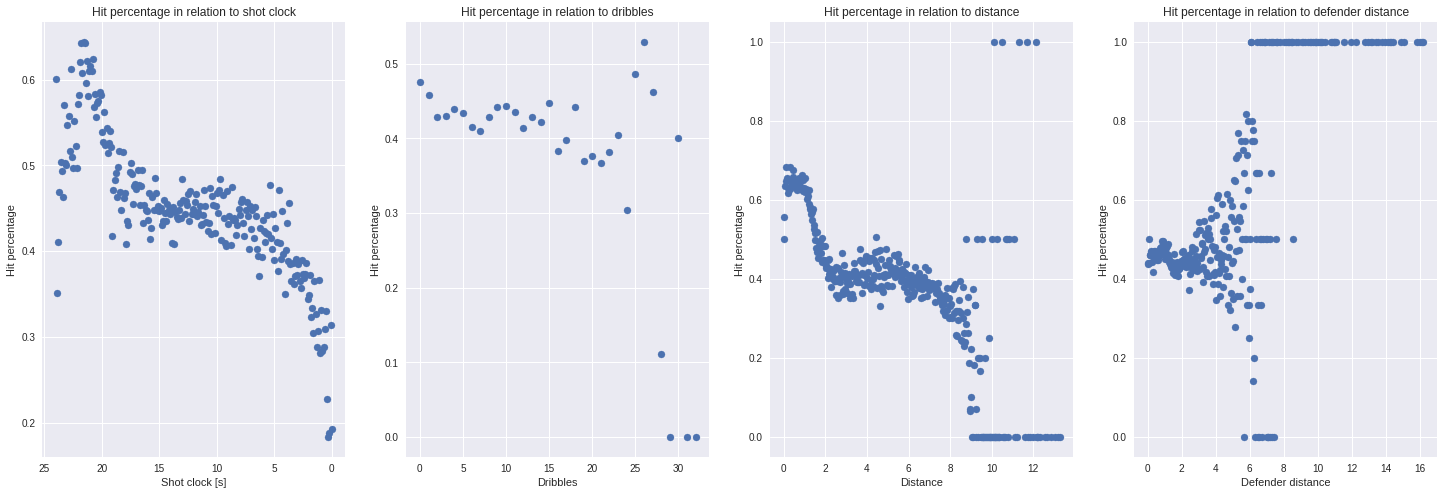

In [30]:
fig, axs = plt.subplots(1,4,figsize=(25, 8))
score_clock = df_cleaned.groupby('SHOT_CLOCK').mean()
axs[0].scatter(score_clock['FGM'].index,score_clock['FGM'].values)
axs[0].invert_xaxis()
axs[0].set_title("Hit percentage in relation to shot clock")
axs[0].set_xlabel("Shot clock [s]")
axs[0].set_ylabel("Hit percentage")

score_dribble = df_cleaned.groupby('DRIBBLES').mean()
axs[1].scatter(score_dribble['FGM'].index,score_dribble['FGM'].values)
axs[1].set_title("Hit percentage in relation to dribbles")
axs[1].set_xlabel("Dribbles")
axs[1].set_ylabel("Hit percentage")

score_distance = df_cleaned.groupby('SHOT_DIST').mean()
axs[2].scatter(score_distance['FGM'].index,score_distance['FGM'].values)
axs[2].set_title("Hit percentage in relation to distance")
axs[2].set_xlabel("Distance")
axs[2].set_ylabel("Hit percentage")


score_def_distance = df_cleaned.groupby('CLOSE_DEF_DIST').mean()
axs[3].scatter(score_def_distance['FGM'].index,score_def_distance['FGM'].values)
axs[3].set_title("Hit percentage in relation to defender distance")
axs[3].set_xlabel("Defender distance")
axs[3].set_ylabel("Hit percentage")


plt.show()

##  **Odnos vrijednosti nekih značajki u usporedbi je li koš zabijen ili promašen**

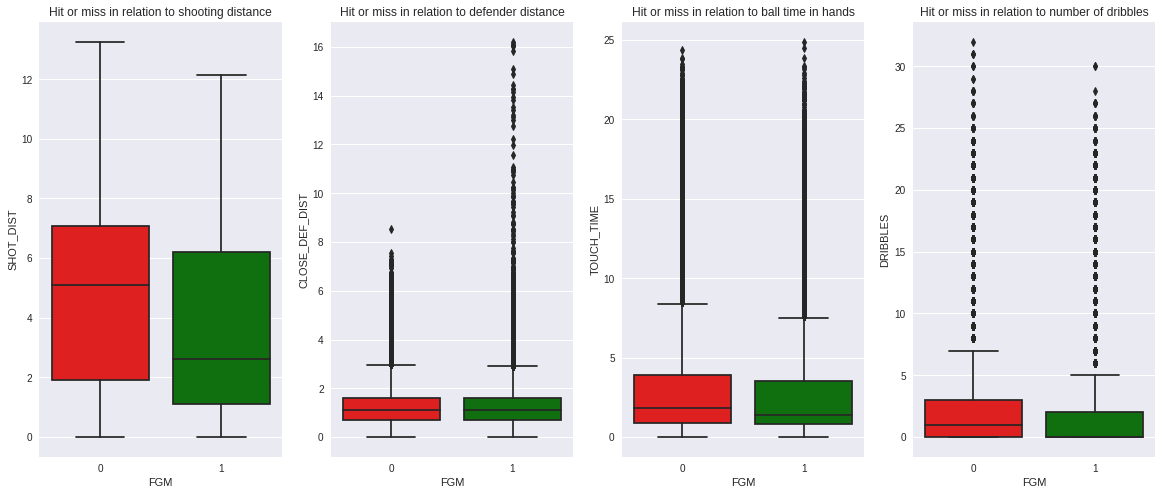

In [31]:
fig, axs = plt.subplots(1,4,figsize=(20, 8))

my_pal = {1: "g", 0: "r"}


ax1 = sns.boxplot(x=df_cleaned['FGM'],y=df_cleaned['SHOT_DIST'],ax=axs[0],palette=my_pal)
ax1.title.set_text('Hit or miss in relation to shooting distance')

ax2 = sns.boxplot(x=df_cleaned['FGM'],y=df_cleaned['CLOSE_DEF_DIST'],ax=axs[1],palette=my_pal)
ax2.title.set_text('Hit or miss in relation to defender distance')

ax3 = sns.boxplot(x=df_cleaned['FGM'],y=df_cleaned['TOUCH_TIME'],ax=axs[2],palette=my_pal)
ax3.title.set_text('Hit or miss in relation to ball time in hands')

ax4 = sns.boxplot(x=df_cleaned['FGM'],y=df_cleaned['DRIBBLES'],ax=axs[3],palette=my_pal)
ax4.title.set_text('Hit or miss in relation to number of dribbles')

plt.show()

## **Analiza korelacije značajki**

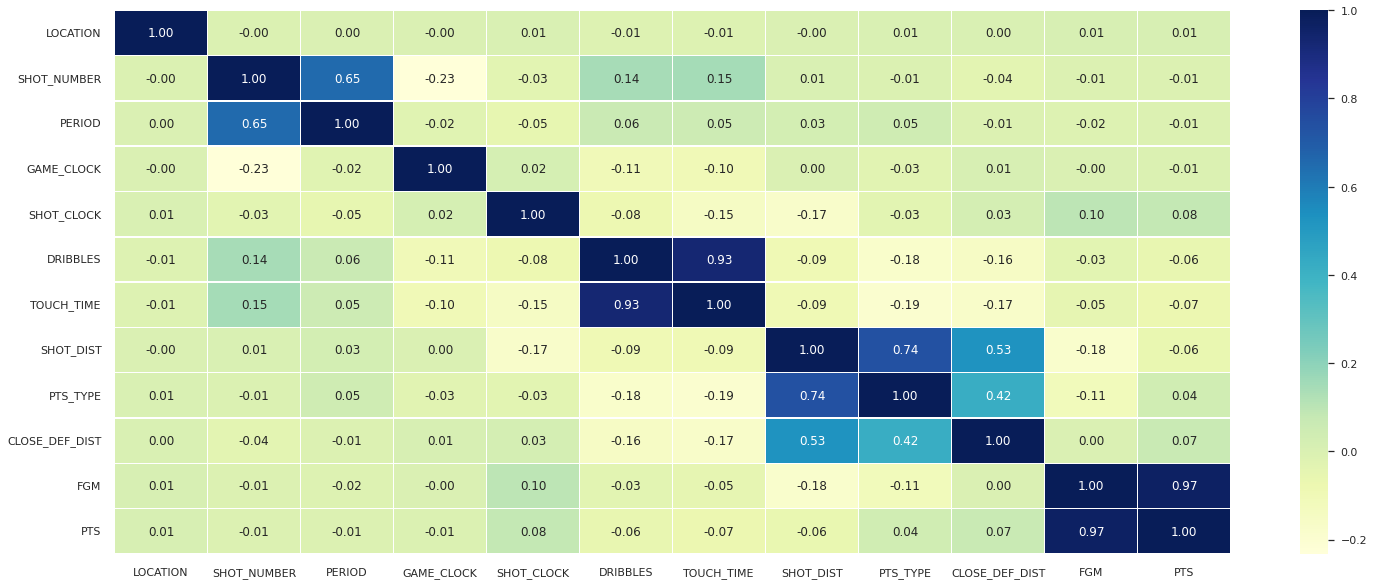

In [32]:
sns.set(rc={'figure.figsize':(25,10)})
sns.heatmap(df_cleaned.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.show()